# EA - Twitter Sentiment Classification 2023-2024

© Explore Data Science Academy

---
### Honour Code

I Andries Reynecke, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Twitter Sentiment Classification 2023-2024

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    


The list of imports has be dramatically amended to accomodate the testing scenarios we are working/worked with. Some items added was not removed even if we removed the function from our code it from the code. 

In [1]:
import time
#General Directory testing
import os
#Libraries for data loading and other basics needed to start
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
#Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import re
from functools import reduce
#Converting text data into a format suitable for machine learning models
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from unidecode import unidecode
from spellchecker import SpellChecker
from textblob import TextBlob
from tqdm import tqdm
tfidf_vectorizer = TfidfVectorizer()
#Train and Evaluate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#Model performance
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The following is used to make sure we are working in the correct directory as well as making sure that all the Datasets we will be using are all present. 

In [2]:
# Print current working directory
print("Current Working Directory:", os.getcwd())

# Print files in the current directory
print("Files in Current Directory:", os.listdir())

Current Working Directory: C:\Users\Andries\Desktop\Data Science\Advanced Classification\Predict
Files in Current Directory: ['.ipynb_checkpoints', 'Classification Predict Overview Slides - Individual.pdf', 'Logistic Regression.docx', 'Project', 'sample_submission.csv', 'sentiment_predictions.csv', 'test.csv', 'train.csv', 'Twitter Sentiment Classification 2023-2024.ipynb', '~$gistic Regression.docx']


Loading the data for us to start working and procesing it. 

In [3]:
train_df = pd.read_csv('train.csv') 
test_df = pd.read_csv('test.csv')

In the train_df we can see the three columns (sentiment, message and tweedid) This as per the discription of the file will be our training data set

In [4]:
#overview of the training dataset
train_df.head(5)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


The test_df does not have a sentiment column as we will be using our model to predict the sentiment. However we need to make sure that both are processed the same. 

In [5]:
#overview of the testing dataset
test_df.head(5)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<a id="three"></a>
# 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The following is only to get an understanding of the size of our datasets. This would be the rows and columns we will have to work with.

In [6]:
#Data shape
train_df.shape

(15819, 3)

In [7]:
#Data shape
test_df.shape

(10546, 2)

#### Having a general look at the data sets

- To determine the data types - so that we know what we are working with
- Making sure we have no Null/missing entries

To be done on both to ensure they are both in order

In [8]:
#Checking data type/Null Count for each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [9]:
#Checking data type/Null Count for each column
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


## Sentiments
We need to have a look at the sentiments and also confirm that the sentiment number are infact -1, 0, 1, 2 as any errors can lead to incorrect model training and affect our final result. But from what we can see the sentiments are in line and there are no foreign values. 

C:\Users\Andries\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andries\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


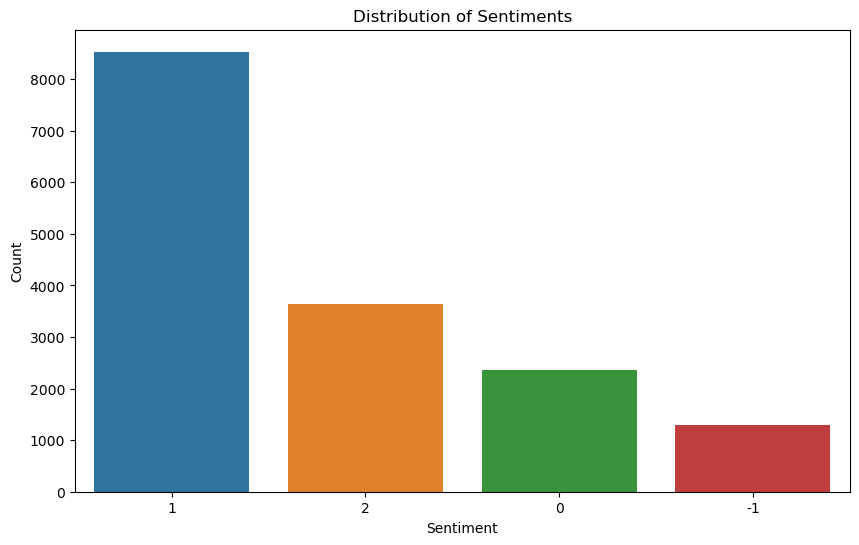

In [10]:
# Assuming you have a 'sentiment' column in your DataFrame
sentiment_counts = train_df["sentiment"].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x="sentiment", data=train_df, order=sentiment_counts.index)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Tweed ID's

The tweed id bar graph was needed to determine the and confirm we dont have any duplicate id's this was well could lead to problems with our models performance. As we can see we have no duplicates and therefore no concern.

C:\Users\Andries\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andries\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andries\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


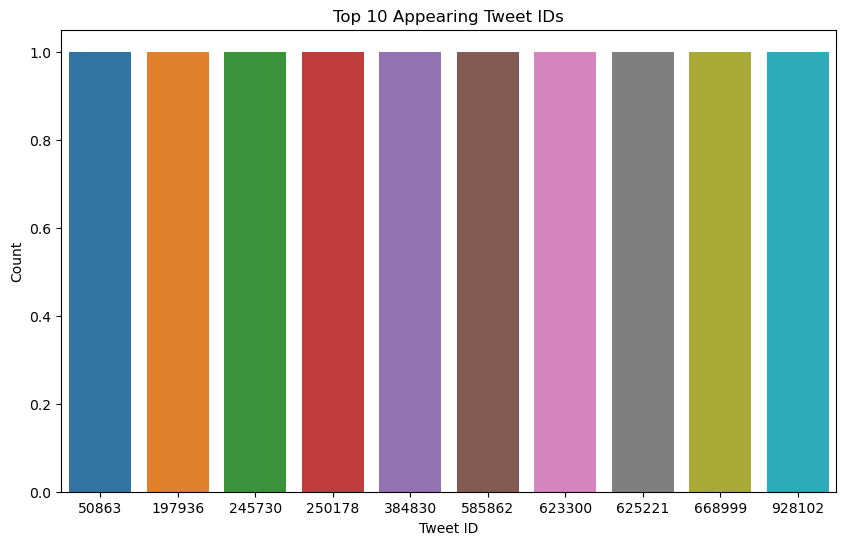

In [11]:
tweetid_counts = train_df["tweetid"].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=tweetid_counts.index, y=tweetid_counts.values)
plt.title('Top 10 Appearing Tweet IDs')
plt.xlabel('Tweet ID')
plt.ylabel('Count')
plt.show()

We have noted above that the both instances of the data received are in order and there will be no further exploration needed. In the train.csv the Sentiment, message and tweetid is in line 15819 values each. The same with our test set, 10546.

<a id="four"></a>
# 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### The following steps will be followed for us to process the data to make it work with our modeling

- Making copy of our data to ensure our experimenting would not corrupt our data.
- Text Preprocessing
- Looking at wordclouds and comparing our train and test messages
- Vectorizing our words

Making copies of our dataset to avoid unrecoverable problems using __.copy()__

In [12]:
#Making copies of our data sets
copy_train_df = train_df.copy()
copy_test_df = test_df.copy()

### Text Preprocessing

- Before star with our functions, we need to download the stopword data set from NLTK. 
- Download the WordNet dataset from NLTK. 
- Retrieve the list of english stopwords from NLTK. 
- Add additional punctuation that could for some reason not be cleared. 

In [13]:
#Before we start we need to make sure we download NLTK resources 
nltk.download("stopwords")
nltk.download('wordnet')
stopwords_list = stopwords.words("english")
additional_punctuations = ['’','‘']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andries\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andries\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Text processing functions

We listed all the functions and noted a total of 16 were created where we only used 5. The functions where created to allow us to easily amendmend or make changes without having to type or change any code. They are NOT in any particular order at all and the order in question does not matter. 

In [14]:
# Define functions for text preprocessing
#Converting all letters to lowercase
def convert_to_lowercase(text):
    return text.lower()

#Removing all the accents in the messages
def remove_accent_marks(text):
    return unidecode(text)

#Removing all the emails
def cleaning_email_addresses(text):
    return re.sub(r'\S*@\S*\s?', '', text)

#Clearing all URL's in the messages
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)
    
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
    
def cleaning_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)
    
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
    
def cleaning_non_alphanumeric(text):
    return ''.join(char for char in text if char.isalnum() or char.isspace())

def cleaning_numbers(data):
    # Check if data is a list (as it seems to be based on your DataFrame)
    if isinstance(data, list):
        # Apply the cleaning_numbers function to each element in the list
        return [cleaning_numbers(word) for word in data]
    else:
        # If data is a string, perform the cleaning by removing numbers
        return re.sub(r'[0-9]+', '', str(data))

def correct_spelling(text):
    corrected_text = TextBlob(text).correct()
    return str(corrected_text)
    
def tokenize(text):
    return nltk.word_tokenize(text)
    
def stem(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in text]
    
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

def cleaning_repeating_char(text):
    return re.sub(r'\brt\b', '', text, flags=re.IGNORECASE)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [word for word in text if word not in stop_words]

def remove_twitter_handles(text):
    return [word for word in text if not word.startswith('@')]

### Calling the functions

The cleaning_functions list is extremly important as it determines what function will run in which order. Any changes to the list will impact the models performance. That then also means any changes or tests will be made without much effort. 

In [15]:
# Define a function to apply all cleaning functions in the order required
def preprocess_text(text):
    cleaning_functions = [
        convert_to_lowercase,
#        cleaning_repeating_char,
#        cleaning_email_addresses,
#        cleaning_repeating_char,
#        cleaning_ascii,
#        cleaning_punctuations,
#        cleaning_URLs,
        tokenize,
        remove_twitter_handles,
#        stem,     
#        remove_stopwords,
#        remove_accent_marks,
#        cleaning_non_alphanumeric,
        cleaning_numbers,
#NO GO   correct_spelling,# Rest of the code removed used used the Glove data base. Took 7 hours to get an error. 
        lemmatize,
]
    # Apply all cleaning functions sequentially
    cleaned_text = reduce(lambda txt, func: func(txt), cleaning_functions, text)
    return cleaned_text

The following preprocessing will show us the before and after to ensure changes where made accordingly. 

In [16]:
# Apply preprocessing to the "message" column train_df
print(copy_train_df.head(10))
copy_train_df["message"] = copy_train_df["message"].apply(preprocess_text)
print(copy_train_df.head(10))

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954
5          1  Worth a read whether you do or don't believe i...   425577
6          1  RT @thenation: Mike Pence doesn’t believe in g...   294933
7          1  RT @makeandmendlife: Six big things we can ALL...   992717
8          1  @AceofSpadesHQ My 8yo nephew is inconsolable. ...   664510
9          1  RT @paigetweedy: no offense… but like… how do ...   260471
   sentiment                                            message  tweetid
0          1  [polyscimajor, epa, chief, doe, n't, think, ca...   625221
1          1  [it, 's, not, like, we, lack, evidenc

In [17]:
# Apply preprocessing to the "message" column test_df
print(copy_test_df.head(10))
copy_test_df["message"] = copy_test_df["message"].apply(preprocess_text)
print(copy_test_df.head(10))

                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928
5  RT @nycjim: Trump muzzles employees of several...    75639
6  @bmastenbrook yes wrote that in 3rd yr Comp Sc...   211536
7  RT @climatehawk1: Indonesian farmers weather #...   569434
8  RT @guardian: British scientists face a ‘huge ...   315368
9  Aid For Agriculture | Sustainable agriculture ...   591733
                                             message  tweetid
0  [europe, will, now, be, looking, to, china, to...   169760
1  [combine, this, with, the, polling, of, staffe...    35326
2  [the, scary, ,, unimpeachable, evidence, that,...   224985
3  [karoli, morgfair, osborneink, dailykos, putin...   476263
4  [rt, 

### Wordcloud

We can clearly note the text has not yet been completely processed. This would be obvious as we have not used all the functions available to us. During the testing phase I noted anything preprocesing with more that 5 functions reduces the models performance dramatically. I then started the eliminating process and found that we dont need to clean the text to a point where we can interpret it. The model needs to. 

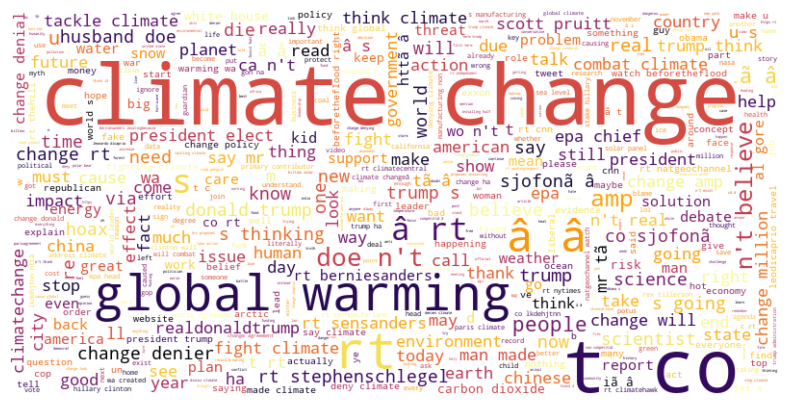

In [18]:
# Join the different processed messages together.
long_string = ' '.join([' '.join(message) for message in copy_train_df["message"]])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=500, 
                      contour_width=3, 
                      contour_color='steelblue', 
                      colormap='inferno', 
                      width=800, 
                      height=400)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

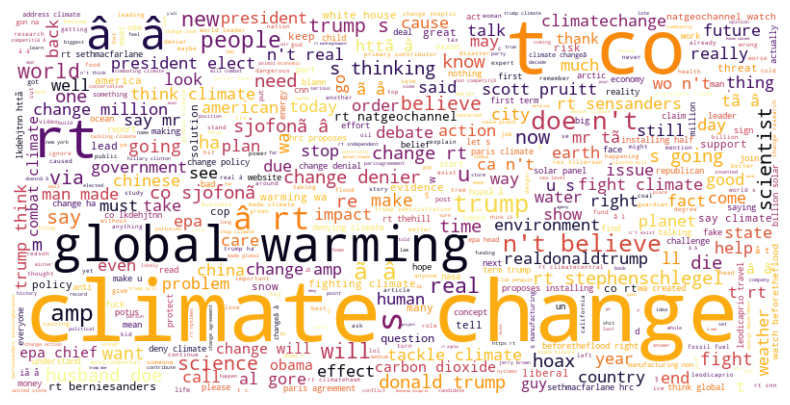

In [19]:
# Join the different processed messages together.
long_string = ' '.join([' '.join(message) for message in copy_test_df["message"]])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=500, 
                      contour_width=3, 
                      contour_color='steelblue', 
                      colormap='inferno', 
                      width=800, 
                      height=400)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Vectorizing

- Count Vectorization represents documents based on word frequencies
- TF-IDF Vectorization considers both word frequencies and the rarity of words in the entire corpus. 

In the following case used both to test and for our model we noted the Count as being the best fit. 

In [20]:
# Convert the tokenized messages back into strings
train_messages_as_strings = [' '.join(message) for message in copy_train_df["message"]]
test_messages_as_strings = [' '.join(message) for message in copy_test_df["message"]]

# Create a CountVectorizer object
count_vectorizer = CountVectorizer()
# Fit and transform the training data
count_vectors_train = count_vectorizer.fit_transform(train_messages_as_strings)
# Transform the test data using the same vectorizer
count_vectors_test = count_vectorizer.transform(test_messages_as_strings)

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the training data
tfidf_vectors_train = tfidf_vectorizer.fit_transform(train_messages_as_strings)
# Transform the test data using the same vectorizer
tfidf_vectors_test = tfidf_vectorizer.transform(test_messages_as_strings)

<a id="five"></a>
# 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

## Model Building
Now that we have our processed our data we are now ready to build our model.

To start our modeling we will need to split the training columns X and Y

In [21]:
#Assigning values to use in our data split.
X = count_vectors_train
Y = copy_train_df['sentiment']

What we going to do is to split our data into 90% for training and the remaining 10% for testing i.e test_size = 0.1 A random_state of 1 was selected so that we can reproduce the results. During my testing I noted very important factors:

- Increasing the train size to 90 dramatically improved our models performance
- The random state can have a large impact up to 0,025. Pick a random state and stay with it. 

In [22]:
#Separating our model into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state = 1)

Lets confirm the numbers on our split:

In [23]:
#Confirming the data is split correctly
print('Training Predictor:', X_train.shape)
print('Training Target:', y_train.shape)
print('Testing Predictor:', X_test.shape)
print('Testing Target:', y_test.shape)

Training Predictor: (14237, 30077)
Training Target: (14237,)
Testing Predictor: (1582, 30077)
Testing Target: (1582,)


### We used the following 7 classifiers models so see which would suite our model best:

- Logistic Regression
- Nearest Neighbors
- Linear SVM
- RBF SVM
- Decision Tree
- Random Forest
- AdaBoost
- Neural Network
- Poly SVM

A hyperparameter dictionary was created that would allow us to make change at one tab and on the same tab set muliple measurements for the models to run and determine the best parameters to use. 

In [24]:
# Define classifiers with their respective hyperparameter grids
classifiers = {
    'Logistic Regression': (LogisticRegression(max_iter=10000), {'C': [1, 3, 5, 8, 10]}),
    'Nearest Neighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Linear SVM': (SVC(kernel='linear'), {'C': [0.1, 1, 2, 4]}),
    'RBF SVM': (SVC(kernel='rbf'), {'C': [8, 10], 'gamma': [0.05, 0.1]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [2, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 75, 100], 'max_depth': [2, 5, 10]}),
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 75, 100], 'learning_rate': [ 0.01, 0.1, 1]}),
    'Naive Bayes': (MultinomialNB(), {}),
    'Neural Network': (MLPClassifier(), {'hidden_layer_sizes': [(100,),(125,)], 'max_iter': [200, 225]}),
    'Poly SVM': (SVC(kernel='poly'), {'C': [7, 10, 20], 'degree': [2, 3, 4]}),
}

### Model building and testing

- The code initializes two empty lists, classifier_names and f1_scores, to store the names of classifiers and their corresponding F1 scores.
- The code then loops through each classifier in the classifiers dictionary.
- For each classifier, it uses GridSearchCV to perform hyperparameter tuning. 
- GridSearchCV searches over a specified parameter grid to find the best hyperparameters for the given classifier.
- The scoring metric used for evaluation is the weighted F1 score (scoring='f1_weighted').
- The training data (X_train and y_train) is used to perform the hyperparameter tuning.
- After tuning, the best hyperparameters and the best model are obtained from the grid search results.
- The best model obtained from hyperparameter tuning is then evaluated on the validation set (X_test, y_test) to calculate the F1 score.
- The F1 score is computed using the f1_score function with the weighted averaging method (average="weighted").
- The name of the classifier (name) and its corresponding F1 score on the validation set (f1_val) are stored in the lists classifier_names and f1_scores, respectively.

In [25]:
# Making a list of the f1_scores and Classifier names for future use:
start_time = time.time()
classifier_names = []
f1_scores = []

# Loop through classifiers and perform hyperparameter tuning
for name, (classifier, param_grid) in tqdm(classifiers.items(), desc="Classifiers"):
    grid_search = GridSearchCV(classifier, param_grid, scoring='f1_weighted', cv=3)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_pred_val = best_model.predict(X_test)
    f1_val = f1_score(y_test, y_pred_val, average="weighted")

    # Store classifier name and F1 score
    classifier_names.append(name)
    f1_scores.append(f1_val)

    print(f"{name} - Best Hyperparameters: {best_params}, F1 Score on Validation Set: {f1_val}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")

Classifiers:  10%|███████                                                               | 1/10 [01:02<09:20, 62.31s/it]

Logistic Regression - Best Hyperparameters: {'C': 1}, F1 Score on Validation Set: 0.7666624476216484


Classifiers:  20%|██████████████                                                        | 2/10 [01:20<04:53, 36.65s/it]

Nearest Neighbors - Best Hyperparameters: {'n_neighbors': 3}, F1 Score on Validation Set: 0.5324425579931994


Classifiers:  30%|████████████████████▋                                                | 3/10 [05:11<14:36, 125.24s/it]

Linear SVM - Best Hyperparameters: {'C': 0.1}, F1 Score on Validation Set: 0.7563567721819353


Classifiers:  40%|███████████████████████████▌                                         | 4/10 [11:26<22:22, 223.80s/it]

RBF SVM - Best Hyperparameters: {'C': 10, 'gamma': 0.05}, F1 Score on Validation Set: 0.7439267012690598


Classifiers:  50%|██████████████████████████████████▌                                  | 5/10 [11:33<12:08, 145.68s/it]

Decision Tree - Best Hyperparameters: {'max_depth': 10}, F1 Score on Validation Set: 0.6120916401008767


Classifiers:  60%|█████████████████████████████████████████▍                           | 6/10 [12:10<07:14, 108.59s/it]

Random Forest - Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}, F1 Score on Validation Set: 0.39744671797024206


Classifiers:  70%|████████████████████████████████████████████████▎                    | 7/10 [24:40<15:54, 318.21s/it]

AdaBoost - Best Hyperparameters: {'learning_rate': 1, 'n_estimators': 100}, F1 Score on Validation Set: 0.662416519784609
Naive Bayes - Best Hyperparameters: {}, F1 Score on Validation Set: 0.6858201835649331


Classifiers:  90%|███████████████████████████████████████████████████████████▍      | 9/10 [1:22:43<16:45, 1005.69s/it]

Neural Network - Best Hyperparameters: {'hidden_layer_sizes': (100,), 'max_iter': 200}, F1 Score on Validation Set: 0.74894831356684


Classifiers: 100%|██████████████████████████████████████████████████████████████████| 10/10 [1:34:53<00:00, 569.36s/it]

Poly SVM - Best Hyperparameters: {'C': 10, 'degree': 2}, F1 Score on Validation Set: 0.7331964525789579
Execution Time: 5693.598701953888 seconds


<a id="six"></a>
# 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

We want to look at the results a bit more visually, therefore we will be drafting a bar graph to compare.

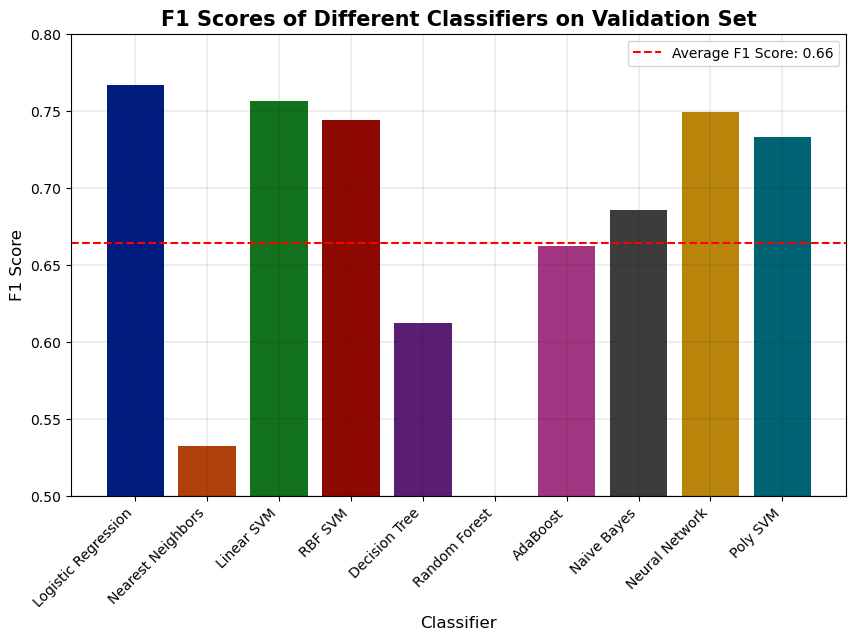

In [26]:
# Define a color palette (you can customize this or use different seaborn palettes)
colors = sns.color_palette("dark", len(classifier_names))

# Create a bar graph
plt.figure(figsize=(10, 6))

# Iterate through classifiers and f1_scores, assigning a unique color to each bar
for classifier, f1_score, color in zip(classifier_names, f1_scores, colors):
    plt.bar(classifier, f1_score, color=color)

# Add grid for better readability
plt.grid(True, which="both", ls="-", linewidth=0.1, color='0.10', zorder=0)

# Add a horizontal line showing average F1 score
avg_f1_score = sum(f1_scores) / len(f1_scores)
plt.axhline(y=avg_f1_score, color='r', linestyle='--', label=f'Average F1 Score: {avg_f1_score:.2f}')
plt.legend()

# Set title and labels
plt.title('F1 Scores of Different Classifiers on Validation Set', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)

# Set y limit
plt.ylim(0.5, 0.8)

# Show the plot
plt.show()

### Classifiers performance

#### Logistic Regression:
Best Hyperparameters: {'C': 1}
F1 Score on Validation Set: 0.7667

#### Nearest Neighbors (KNN):
Best Hyperparameters: {'n_neighbors': 3}
F1 Score on Validation Set: 0.5324

#### Linear SVM:
Best Hyperparameters: {'C': 0.1}
F1 Score on Validation Set: 0.7564

#### RBF SVM:
Best Hyperparameters: {'C': 10, 'gamma': 0.05}
F1 Score on Validation Set: 0.7439

#### Decision Tree:
Best Hyperparameters: {'max_depth': 10}
F1 Score on Validation Set: 0.6121

#### Random Forest:
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}
F1 Score on Validation Set: 0.3974

#### AdaBoost:
Best Hyperparameters: {'learning_rate': 1, 'n_estimators': 100}
F1 Score on Validation Set: 0.6624

#### Naive Bayes:
Best Hyperparameters: (No hyperparameters tuned, default settings)
F1 Score on Validation Set: 0.6858

#### Neural Network:
Best Hyperparameters: {'hidden_layer_sizes': (100,), 'max_iter': 200}
F1 Score on Validation Set: 0.7489

#### Poly SVM:
Best Hyperparameters: {'C': 10, 'degree': 2}
F1 Score on Validation Set: 0.7332

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Logistic Regression and Linear SVM as well as further feedback:

Both Logistic Regression and Linear SVM achieved relatively high F1 scores on the validation set. This is a positive outcome, suggesting that these classifiers are performing well on the given dataset. The F1 score is a measure of a model's accuracy, balancing precision and recall. High F1 scores indicate good overall performance.
Random Forest:

Random Forest had a low F1 score on the validation set. The F1 score is a metric that considers both false positives and false negatives, and a low F1 score may suggest that the model is struggling to balance precision and recall. This could be due to the specific hyperparameters used for tuning. Further investigation into different hyperparameters or model adjustments might be necessary to improve Random Forest's performance.
Execution Time:

The execution time for each classifier is provided. Some classifiers took significantly longer to tune and evaluate, as indicated by the elapsed time for each classifier. This information is important, especially when considering computational resources and time constraints. It allows you to assess not only the performance of the classifiers but also their efficiency in terms of computational cost.

## Creating the CSV file for the Kaggle competition

Using the regression model to predict the shortfall between energy generated by fossil fuels and energy generated with renewable sources.  

In [27]:
# Convert the sparse matrix to a DataFrame (assuming 'tweetid' is in the original DataFrame)
count_vectors_test_df = pd.DataFrame(count_vectors_test.toarray(), columns=count_vectorizer.get_feature_names_out())

# Use the best model to predict sentiments for the test data
y_pred_test = best_model.predict(count_vectors_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'tweetid': copy_test_df['tweetid'],  # Assuming 'tweetid' is in the original DataFrame
    'sentiment': y_pred_test
})

# Export the results to a CSV file
results_df.to_csv('sentiment_predictions.csv', index=False)

# Display the first few rows of the results DataFrame
print(results_df.head())

   tweetid  sentiment
0   169760          1
1    35326          1
2   224985          1
3   476263          1
4   872928          0
